# Medidas de Tendência Central
### As medidas de tendência central definem valores significativos, representativos e adequados para um conjunto de dados, dependendo do que se deseja analisar. São elas a média, mediana, quantis e a moda.

# Média
### A média é uma medida de tendência central que indica o valor onde estão concentrados os dados de um conjunto de valores, representando um valor significativo para o mesmo.

### No caso dos Dataframes do Pandas, a média é calculada através da função mean() dos Dataframes, que também está presente nas Series do Pandas. Vamos criar uma Series do Pandas e calcular sua média, e também vamos calcular a idade média dos passageiros do Titanic:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

train_df = pd.read_csv('/train.csv')
example_series =  pd.Series([1,5,10,30,50,30,15,40,45])

print(example_series.mean())
25.11111111111111

25.11111111111111


25.11111111111111

# Mediana e Quantil
### A mediana é o valor que separa a metade superior da metade inferior de uma distribuição de dados, ou o valor no centro da distribuição. Na prática, se o número de observações na distribuição é ímpar, ele é o valor central, e se o número de observações é par, ele será a média das duas observações mais centrais. Ela é calculada através da função median(), novamente, presente em dataframes e series. Vejamos abaixo:

In [ ]:
print(example_series.median())
30.0

30.0


30.0

### A mediana é um conceito menos suscetível a grandes valores discrepantes do que a média. Se o número de observações não é muito grande e você tem uma observação que é muito maior do que os outros, a sua média pode começar a ficar menos representativa com relação à maioria do seu grupo. Por exemplo, se você está analisando o rendimento de uma classe da faculdade e um deles é um milionário, enquanto o restante é o trabalhador médio da empresa, a mediana será, provavelmente, uma melhor representação dos rendimentos do grupo como um todo, uma vez que a média estará “contaminada” pelo valor discrepante.

### Já o quantil pode ser entendido como uma generalização da mediana. O quantil é o valor abaixo do qual está um certo percentual dos dados. No caso da mediana, esse percentual é de 50%. Vejamos o código para o quantil, que pode ser calculado através da função quantile(). Esta função, por padrão, adota o percentual (representado através do parâmetro q) de 50%, ou seja, é uma mediana por padrão. Você pode configurar outros percentuais através deste mesmo parâmetro:

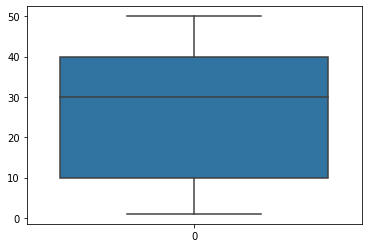

In [ ]:
sns.boxplot(data=example_series)

# Moda
### A moda é simples. Nada mais é que o valor que mais se repete dentro de um conjunto. No Pandas, a moda é calculada através da função mode(). Vejamos os exemplos:

In [ ]:
print(example_series.mode())

0    30
dtype: int64


### A função retorna os valores deste jeito pois, no caso de dois valores diferentes para a moda, a função retorna todos. Vejamos:

In [ ]:
example_series_2 =  pd.Series([1,5,10,30,50,30,15,40,45,45])
print(example_series_2.mode())

0    30
1    45
dtype: int64


# Medidas de Dispersão
### As medidas de dispersão são medidas que indicam o quão espalhados os dados estão, ou como eles variam. São elas a amplitude, a variância, o desvio padrão e o desvio absoluto.

# Amplitude
### A amplitude nada mais é do que a diferença entre o maior e o menor valor de um conjunto de dados. Para fazer este cálculo no Pandas, usaremos as funções max() e min(), que obviamente, retornam o valor máximo e mínimo de um conjunto de dados, e depois subtrairemos um do outro:

In [ ]:
print(example_series.max() - example_series.min())

49


# Variância
### A variância é uma medida que expressa quanto os dados de um conjunto estão afastados de seu valor esperado. Calculamos a variância no Pandas através da função var():

In [ ]:
print(example_series.var())

325.1111111111111


# Desvio Padrão
### O desvio padrão também é uma medida de dispersão, que indica quanto os dados estão afastados da média. Um valor de desvio padrão alto indica que os valores estão mais espalhados, mais longe da média, e um desvio padrão baixo indica que os valores estão mais próximos da média. No Pandas fazemos o cálculo através da função std():

In [ ]:
print(example_series.std())

18.03083778173136


# Desvio absoluto
### O Desvio Absoluto é calculado da seguinte forma: primeiro, encontramos a média dos valores; depois, calculamos a distância de cada ponto desta média; somamos as distâncias e dividimos o resultado pela média destas distâncias.

### No Pandas, a função mad() faz este cálculo. Vejamos os exemplos:

In [ ]:
print(example_series.mad())

15.432098765432098


# Covariância e Correlação
### Em alguns momentos, queremos saber se duas variáveis possuem alguma relação entre si dentro de um conjunto de dados. Para estes casos, calculamos a covariância e a correlação.

### A covariância é uma medida numérica que indica a inter-dependência entre duas variáveis. A covariância indica como duas variáveis se comportam conjuntamente em relação às suas médias. Uma covariância igual a 0 indica que as duas variáveis são totalmente independentes, enquanto que uma covariância alta e positiva indica que uma variável é grande quando a outra é grande. Analogamente, uma covariância negativa e com valor absoluto alto indica que uma variável é pequena quando a outra é grande. A covariância pode ser calculada no Pandas através da função cov(). Ela retorna uma matriz indicando a covariância de cada coluna com outra:

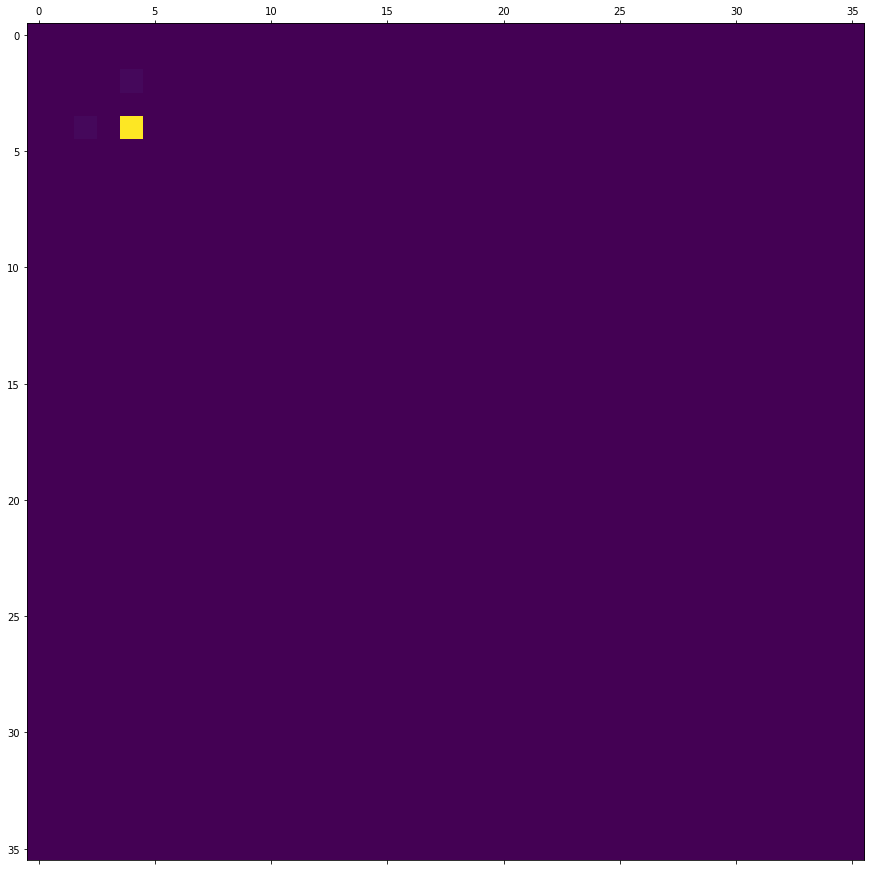

In [ ]:
#print(train_df.cov())
f = plt.figure(figsize=(19, 15))
plt.matshow(train_df.cov(), fignum=f.number)
plt.show()

### A covariância, entretanto, pode ser difícil de ser compreendida e comparada, pois ela nos dá valores em escalas que serão diferentes conforme as variáveis mudem. Para uma melhor comparação, normalizamos a covariância para ter um valor que sempre estará entre 1 e -1, que é a correlação. Logo, a correlação também é outra medida que indica o quanto duas variáveis estão relacionadas. Seu valor fica sempre entre -1, que indica uma anti-correlação perfeita, e 1, que indica uma correlação perfeita. Calculamos a correlação no Pandas com a função corr(), que assim como a função cov(), irá retornar uma matriz com a correlação de cada coluna com as outras colunas do Dataframe:

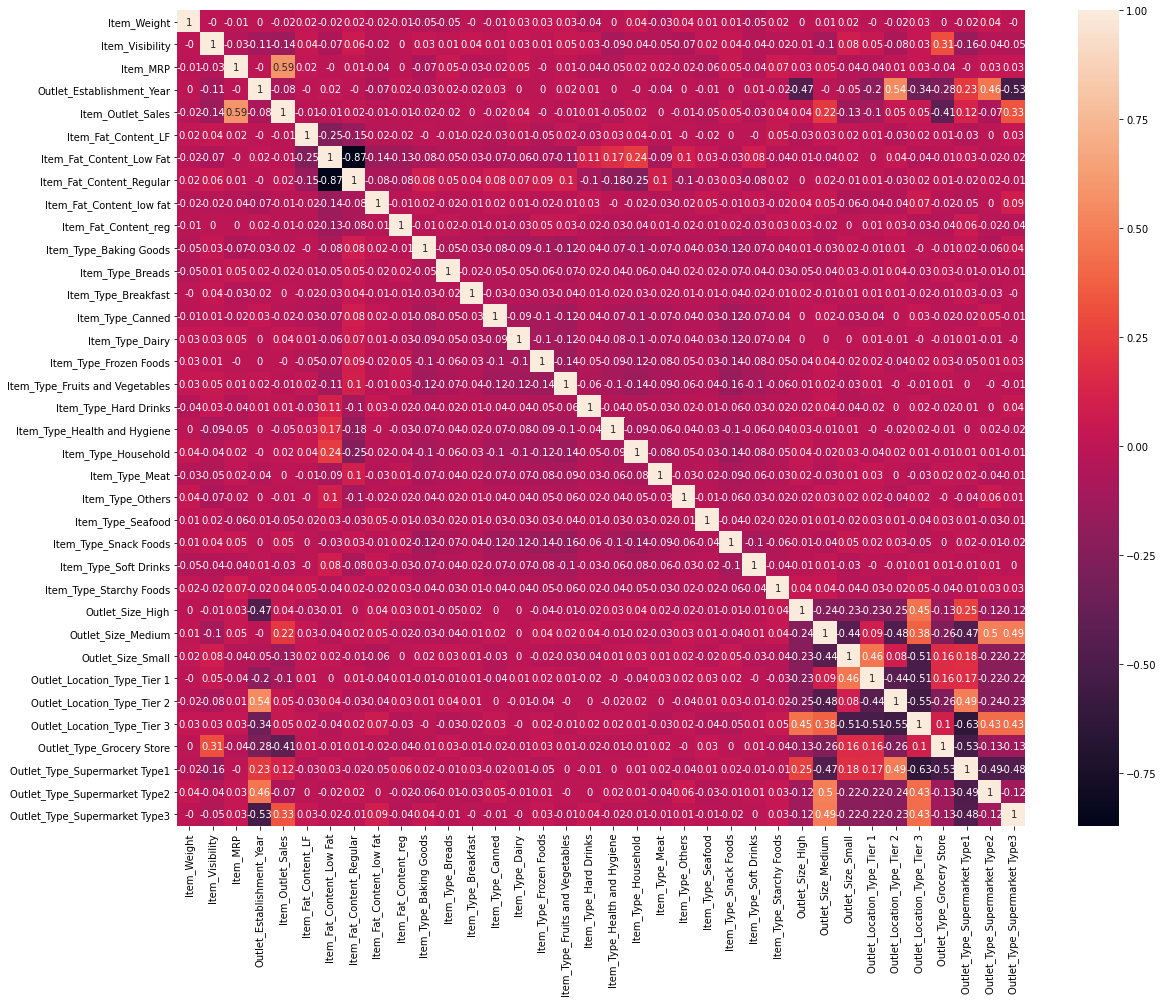

In [ ]:
f = plt.figure(figsize=(19, 15))
corr = train_df.corr().round(2)
sns.heatmap(data=corr, annot=True)

### Entretanto, é necessário cuidado ao avaliar as correlações. Alguns dados podem indicar uma correlação que não existe de fato, e é apenas obra do acaso, o que é possível em certos casos onde variáveis apresentam algum tipo de padrão que pode levar a este valor de correlação.

### Por fim, também é importante atentar para o famoso conceito que diz que “correlação não implica causalidade”. O que isso quer dizer é, quando duas variáveis apresentam um alto valor de correlação, pode ser que a primeira variável cause este comportamento na segunda, que a segunda causa este comportamento na primeira, que ambas causam o comportamento na outra ou isso também pode não dizer nada, como nos casos que mencionamos acima. O segredo para não cair nesta armadilha é conhecer bem os dados, para que se possa fazer sempre uma avaliação criteriosa, caso a caso.



 # Assimetria (skewness): 
 ### mede o grau de simetria da curva, em relação a distribuição normal.

In [3]:
train_df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

### Para dados normalmente distribuídos, a assimetria é bem próxima de zero.
### Uma assimetria positiva, com valor > 0, significa que a cauda da distribuição está mais para a direita. Ou seja, que os valores de moda < mediana < média.
### Uma assimetria negativa, com valor < 0, significa que a cauda da distribuição está mais para a esquerda. Ou seja, que os valores de média < mediana < moda.

# Curtose (kurtosis): 
### mede o grau de achatamento da curva, em relação a curva normal. Em python:

In [4]:
train_df.kurtosis()

PassengerId    -1.200000
Survived       -1.775005
Pclass         -1.280015
Age             0.178274
SibSp          17.880420
Parch           9.778125
Fare           33.398141
dtype: float64

### Se o valor encontrado é igual 0, você tem uma distribuição mesocúrtica; se maior que 0, leptocúrtica, correspondendo a uma curva mais pontuda; se menor que 0, platicúrtica, ou seja, uma curva mais achatada, com maior variabilidade dos dados.